In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv('Position_Salaries.csv')

In [77]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [78]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [79]:
X=df.iloc[:,1:-1].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [80]:
Y=df.iloc[:,-1].values
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [81]:
Y=Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


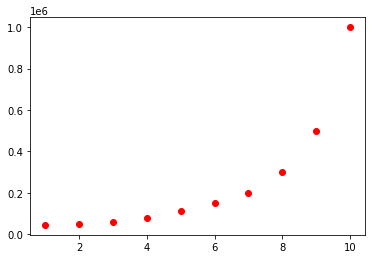

In [82]:
plt.scatter(X,Y,color='red')
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
St_x=StandardScaler()
St_y=StandardScaler()
X=St_x.fit_transform(X)


In [85]:
Y=St_y.fit_transform(Y)

In [86]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [87]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

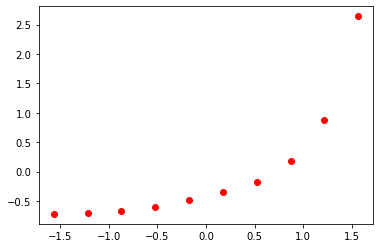

In [88]:
plt.scatter(X,Y,color='red')

In [89]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [93]:
St_y.inverse_transform(reg.predict(St_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

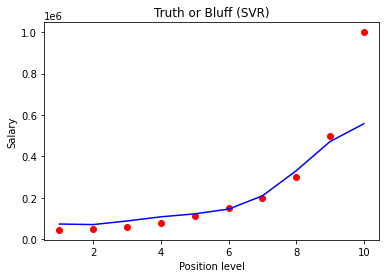

In [95]:
plt.scatter(St_x.inverse_transform(X),St_y.inverse_transform(Y), color = 'red')
plt.plot(St_x.inverse_transform(X),St_y.inverse_transform(reg.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

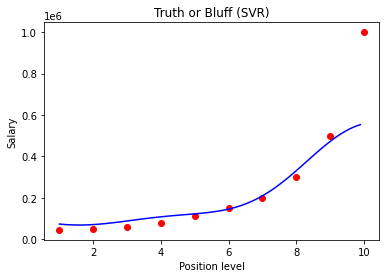

In [101]:
X_grid = np.arange(min(St_x.inverse_transform(X)), max(St_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(St_x.inverse_transform(X),St_y.inverse_transform(Y), color = 'red')
plt.plot(X_grid,St_y.inverse_transform(reg.predict(St_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()